**Depressão e sua reincidência**

Dados extraídos do https://www.kaggle.com/everseek/depression/downloads/depression.zip/1

Informações sobre a base: https://bolt.mph.ufl.edu/2012/08/02/learn-by-doing-exploring-a-dataset/

A depressão clínica é a doença mental mais comum nos Estados Unidos, afetando 19 milhões de adultos a cada ano (Fonte: NIMH, 1999). Quase 50% dos indivíduos que experimentam um episódio importante terão uma recidiva dentro de 2 a 3 anos. Pesquisadores estão interessados ​​em comparar soluções terapêuticas que possam atrasar ou reduzir a incidência de recorrência.

Em um estudo realizado pelo National Institutes of Health, 109 pacientes clinicamente deprimidos foram separados em três grupos, e cada grupo recebeu um dos dois medicamentos ativos (imipramina ou lítio) ou nenhum medicamento. Para cada paciente, o conjunto de dados contém o tratamento utilizado, o resultado do tratamento e várias outras características interessantes.

**Bibliotecas**

In [3]:
import pandas as pd
import pandas_profiling as pandas_p
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

**Explorando os dados**

In [31]:
df = pd.read_excel('depression.xls', encoding='latin1', sep=',')

Hospital: O hospital do paciente, representado por um código para cada um dos 5 hospitais (1, 2, 3, 5 ou 6)

Tratamento: O tratamento recebido pelo paciente (Lítio, Imipramina ou Placebo)

Resultado: se ou não uma recorrência ocorreu durante o tratamento do paciente (recorrência ou não recorrência)

Tempo1: ou o tempo (dias) até a recorrência ou, se não houver recorrência, a duração (dias) da participação do paciente no estudo.

Tempo2: O tempo (dias) em que o paciente estava deprimido antes do estudo.

Idade: A idade do paciente em anos, quando o paciente entrou no estudo.

Sexo: sexo do paciente (1 = feminino, 2 = masculino)

In [5]:
pandas_p.ProfileReport(df)

Number of variables,7
Number of observations,109
Total Missing (%),0.0%
Total size in memory,6.0 KiB
Average record size in memory,56.7 B
Numeric,4
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


**Processando os dados**

Não é viável trabalhar com variáveis esparsas na identificação de padrões, por isso vamos agrupar.

Função de agrupamento em colunas com muitas variavéis

In [32]:
def cria_grupo(df,inferior,superior,coluna_entrada,coluna_saida,resultado):
    indice = (df[coluna_entrada] >=inferior) & (df[coluna_entrada]<=superior)
    df.loc[indice, coluna_saida] = resultado

Agrupar idades

In [33]:
cria_grupo(df,20,29,'Idade','grupo_idade','Grupo_20')
cria_grupo(df,30,39,'Idade','grupo_idade','Grupo_30')
cria_grupo(df,40,49,'Idade','grupo_idade','Grupo_40')
cria_grupo(df,50,59,'Idade','grupo_idade','Grupo_50') 
cria_grupo(df,60,65,'Idade','grupo_idade','Grupo_60') 

Agrupar tempo de depressão

In [34]:
cria_grupo(df,47,90,'Tempo2','grupo_tempo2','um_tri')
cria_grupo(df,91,180,'Tempo2','grupo_tempo2','dois_tri')
cria_grupo(df,181,270,'Tempo2','grupo_tempo2','tres_tri')
cria_grupo(df,271,365,'Tempo2','grupo_tempo2','um_ano') 
cria_grupo(df,366,512,'Tempo2','grupo_tempo2','mais_de_um_ano') 

**Conversão de variável categórica para numérica**

In [7]:
number = preprocessing.LabelEncoder()
df['Tratamento'] = number.fit_transform(df['Tratamento'].astype('str'))
df['Resultado'] = number.fit_transform(df['Resultado'].astype('str'))

<p>Em tratamento:</p> 
Lithium recebeu 1 - Imipramine 0 - Placebo 2

<p>Em Resultado:</p>
Recorrencia recebeu 1 - Não recorrência recebeu 0

**Visualizando os dados**

Visualização do comportamento de cada variável em relação à variável resposta.

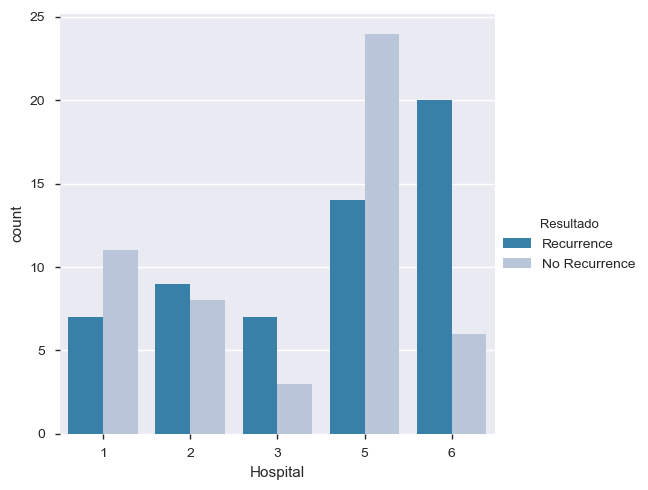

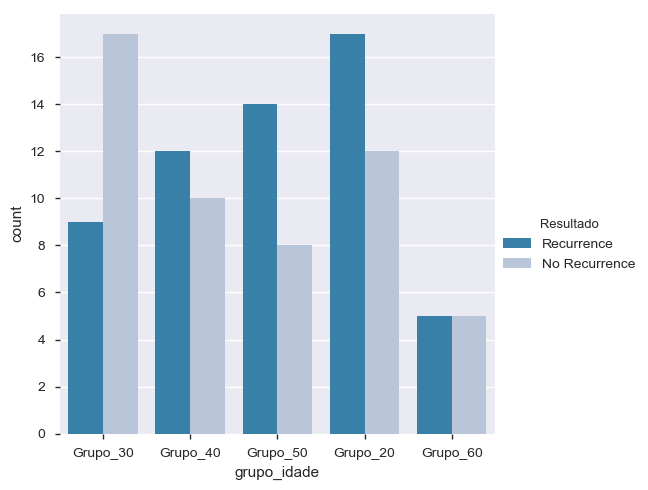

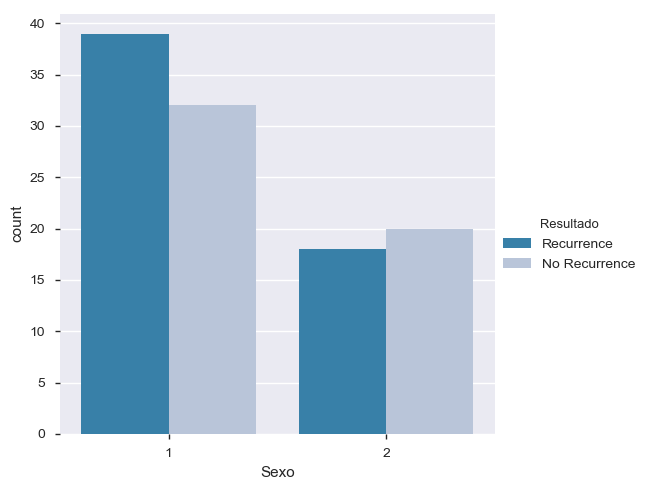

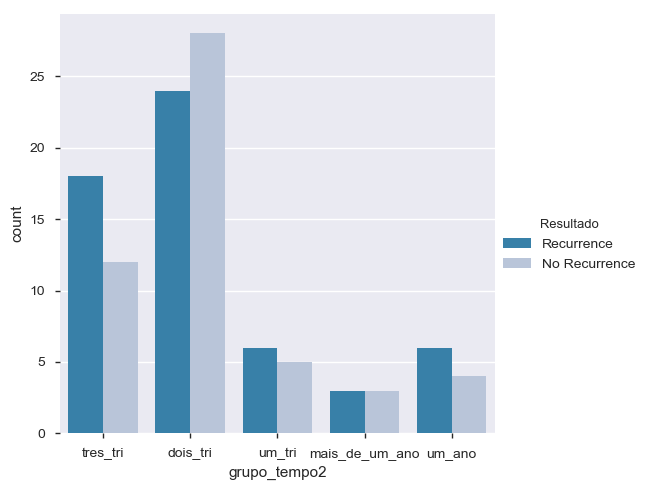

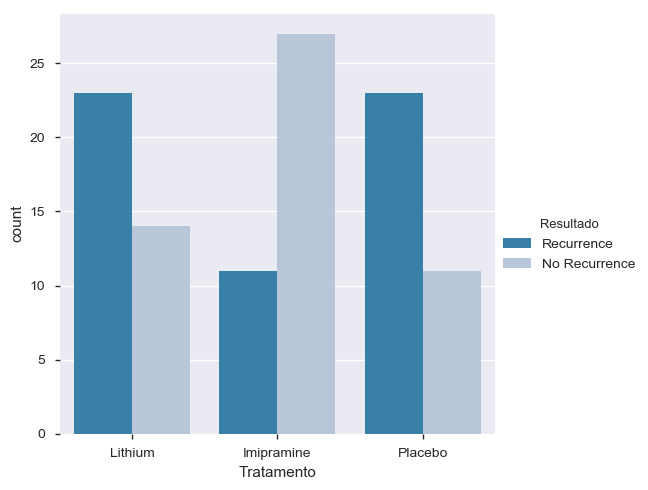

In [35]:
sns.catplot(x="Hospital",hue="Resultado", data=df, kind="count", palette="PuBu_r")
sns.catplot(x="grupo_idade",hue="Resultado", data=df, kind="count", palette="PuBu_r")
sns.catplot(x="Sexo",hue="Resultado", data=df, kind="count", palette="PuBu_r")
sns.catplot(x="grupo_tempo2",hue="Resultado", data=df, kind="count", palette="PuBu_r")
sns.catplot(x="Tratamento",hue="Resultado", data=df, kind="count", palette="PuBu_r")

**Aplicando Random Forest**

In [8]:
def prevendo(p1,p2,p3,p4,p5,p6):
    if clf.predict([[p1,p2,p3,p4,p5,p6]]) == 0:
        print('Você está no caminho certo amigo')
    else:
        print('Existe uma possibilidade de reincidência amigo')

In [9]:
X = df[['Hospital', 'Tratamento', 'Tempo1', 'Tempo2', 'Idade','Sexo']]

In [10]:
y = df.Resultado

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treino and 30% teste

In [12]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
clf.feature_importances_

array([0.08879668, 0.08277437, 0.53493268, 0.13707488, 0.11832171,
       0.03809968])

In [14]:
y_pred=clf.predict(X_test)

**Resultado - Acurácia**

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


**Prevendo**

In [16]:
prevendo(1,0,30,14,26,1)

Existe uma possibilidade de reincidência amigo


In [17]:
prevendo(1,0,30,14,40,1)

Você está no caminho certo amigo
